# Домашнее задание по кластеризации

Набор данных содержит сведения о 9000 клиентов банка.

Колонки в датасете:
- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

## Задания

### Задание 1.

Провести исследование данных (в том числе с визуализацией, к исследованию должны быть даны выводы и комментарии, все графики и оси должны быть подписаны).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/home_work_7-8_clustering/Credit%20Card%20Dataset.csv")

In [2]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Исследуем данные на пропуски
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
# Выводя head я заметил, что nan в MINIMUM_PAYMENTS соответствует 0 в PAYMENTS
# Может так везде? Проверим!
check_df = df[np.logical_and(df['MINIMUM_PAYMENTS'].isna(), df['PAYMENTS']==0)]
print(len(check_df))
# выводит 240, а не 313, значит все не так просто

check_df = df[df['MINIMUM_PAYMENTS'].isna()]
print(len(check_df['PAYMENTS'].unique()))
# имеем 74 различных уникальных значения и знаем, что значение 0 лежит в 240/313 ячеек
# соответственно оставшиеся 73 уникальных значения встречаются по одному разу в оставшихся 73 ячейках

# глянем че лежит в тех строках, где PAYMENTS 0
check_df = df[df['PAYMENTS']==0]
print(check_df['MINIMUM_PAYMENTS'].unique())
# интересная картина. нулю соответствует нан, но нану не всегда соответствует 0.

# вариантов действий несколько. Например можно отбросить все строки с нанами (благо их не очень много, примерно 3%). или отбросить все строки с нулями и придумать чем заполнить наны.
# тот единственный CREDIT_LIMIT = Нан мы точно выкидываем, ради одной строчки смысла париться нет

240
74
[nan]


<Figure size 1000x600 with 0 Axes>

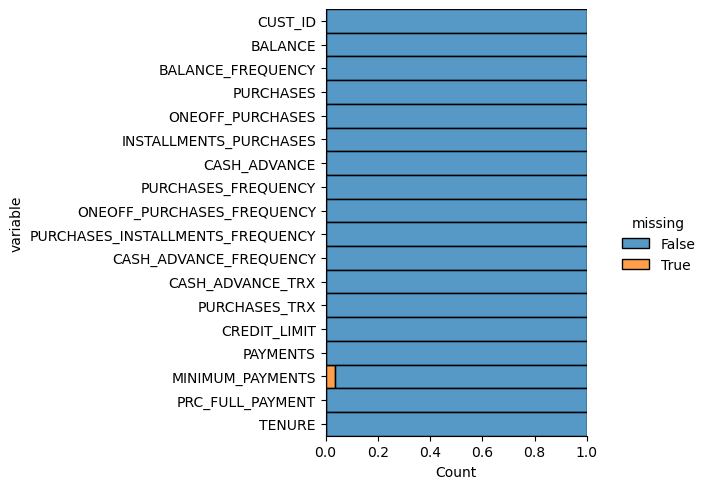

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
# ну и тут бесполезный график на тему исследования выше. График ничего не показывает (особенно наглядно), но пусть будет.

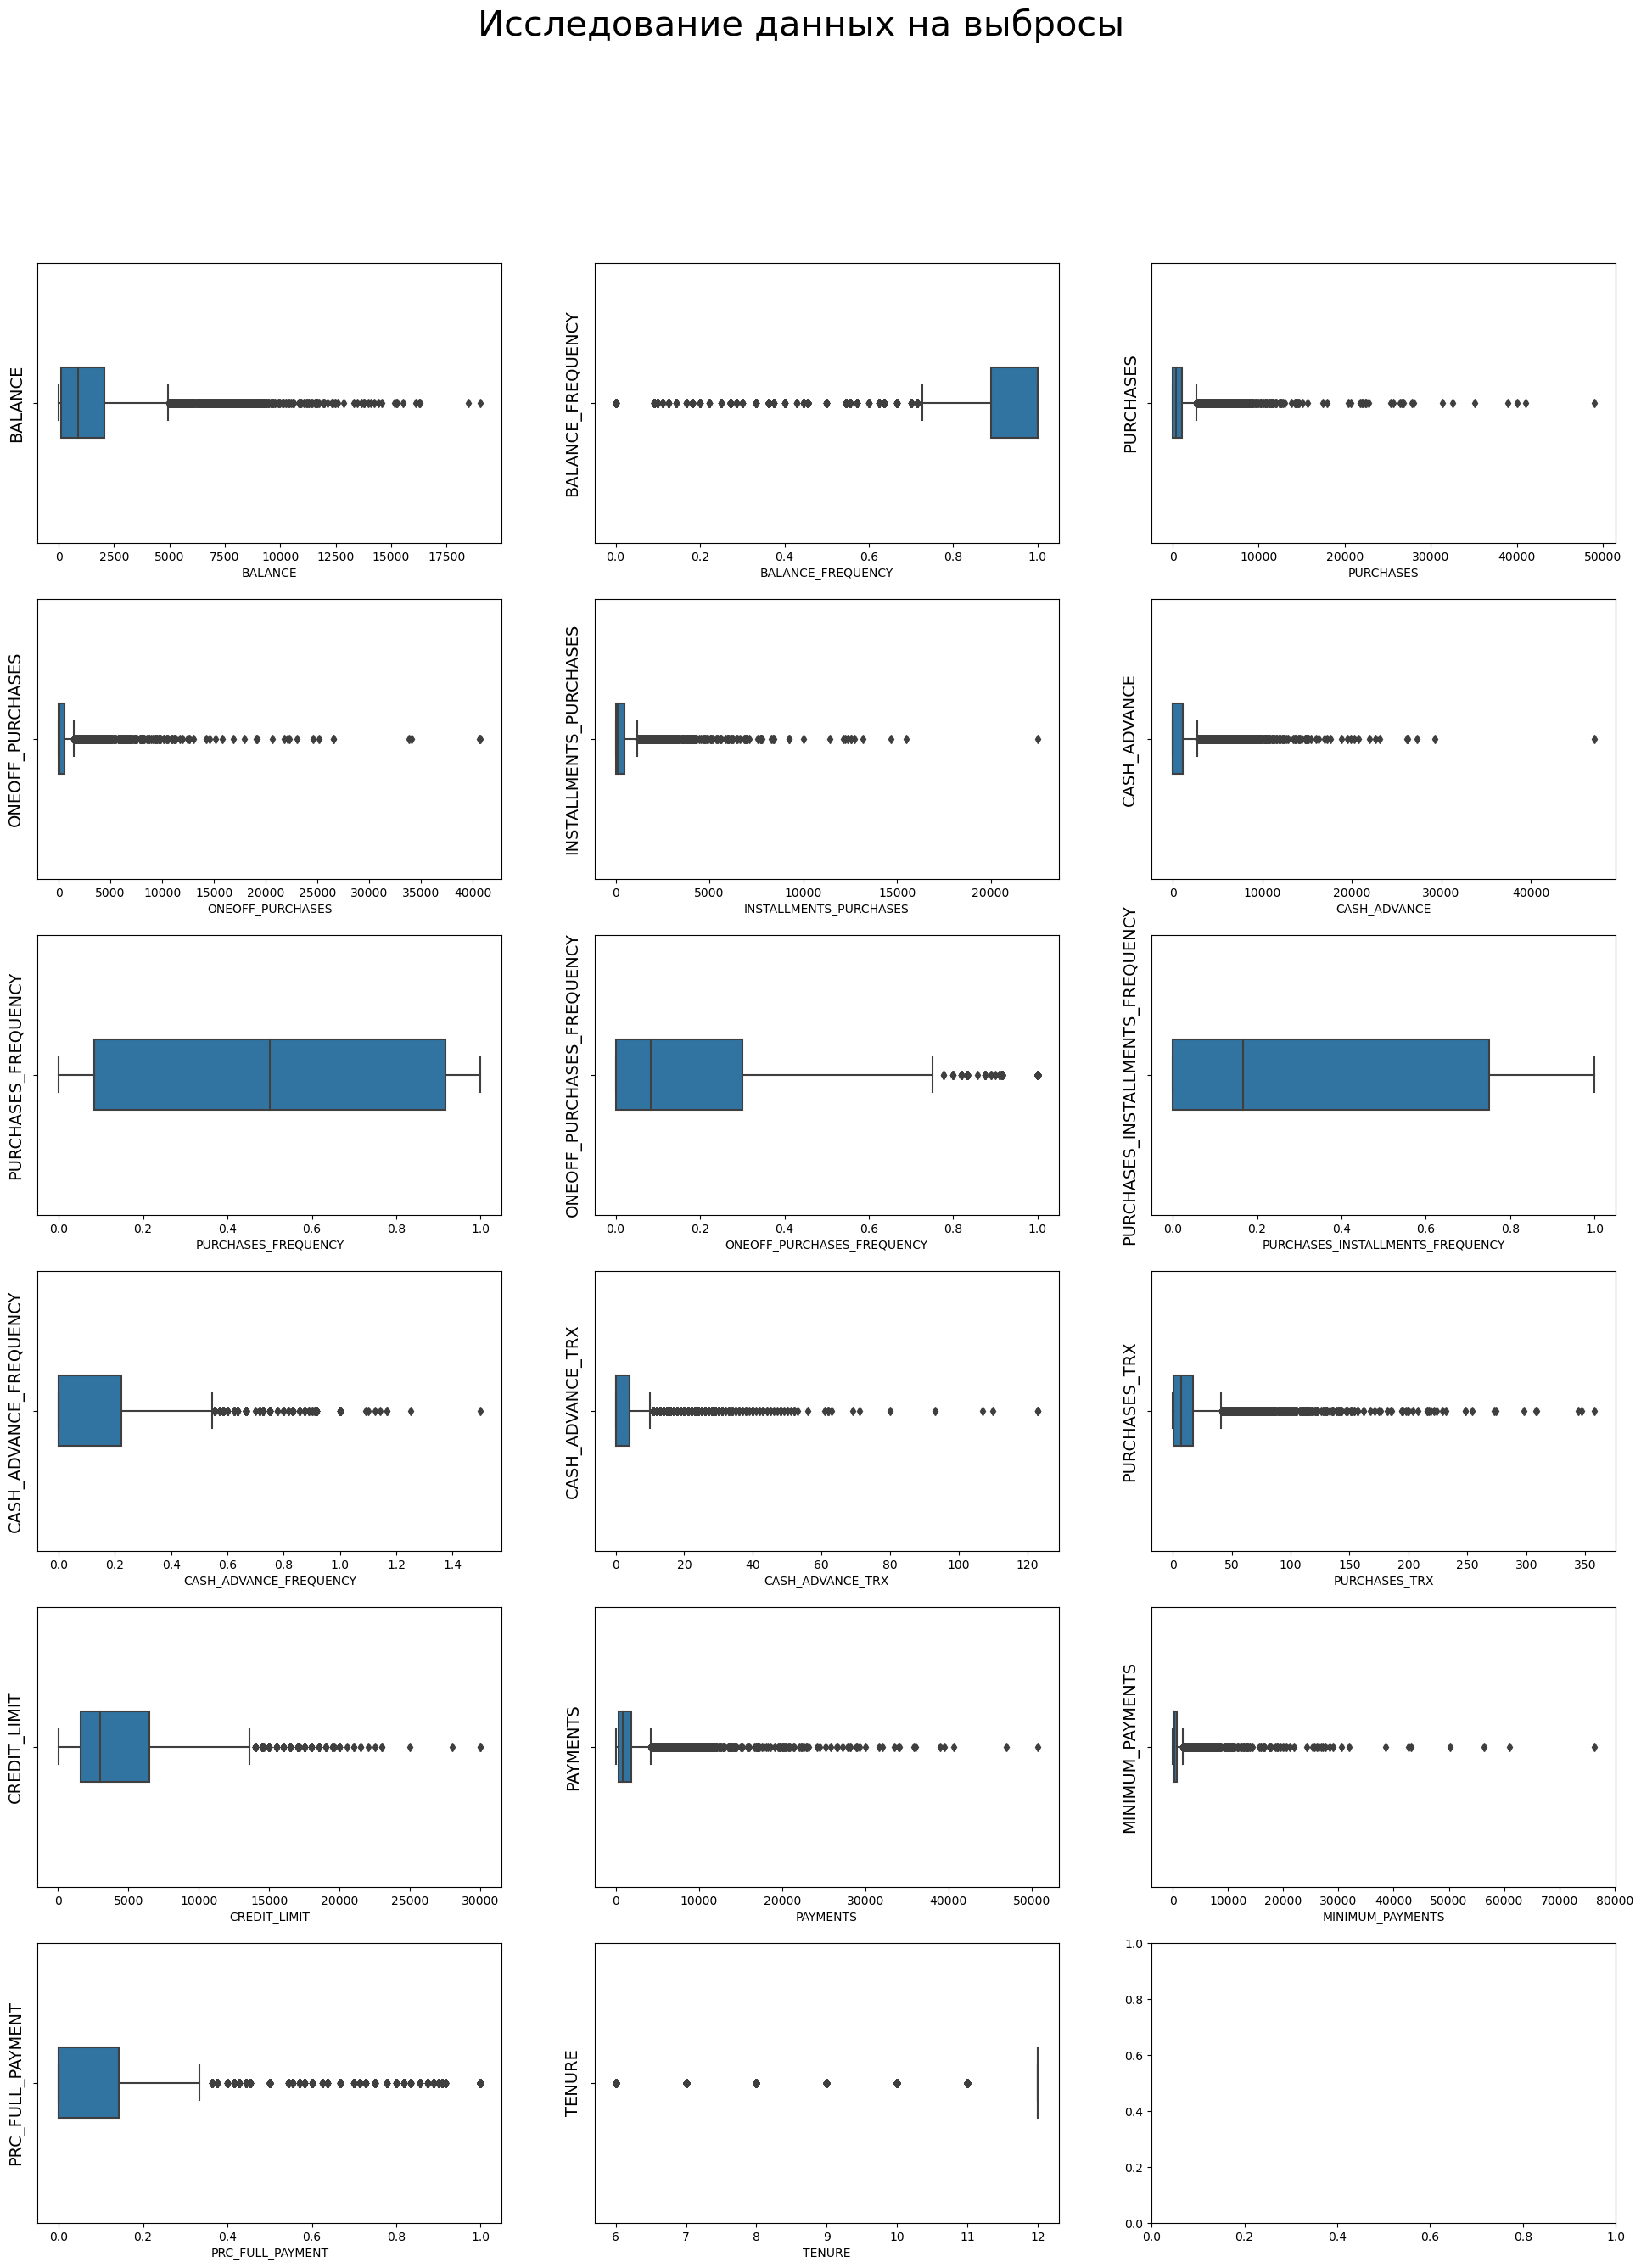

In [6]:
fig, axes = plt.subplots(6, 3, figsize=(24,30))
fig.suptitle("Исследование данных на выбросы", fontsize=30)
c = 0
for name in df.keys():
  if name != 'CUST_ID':
    ax = axes[c//3][c%3]
    ax.set_ylabel(name, fontsize=14)
    sns.boxplot(df[name], ax=ax, width=0.25)
    c += 1
# BALANCE_FREQUENCY, PURCHASESFREQUENCY, ONEOFFPURCHASESFREQUENCY, PURCHASESINSTALLMENTSFREQUENCY, CREDITLIMIT, PRCFULLPAYMENT, TENURE
# Перечисленные выше поля имеют малое количество выбросов (визуально, по плотности точек)
# возможно выбросы не имеют большого значения, тогда с ними можно ничего не делать
# либо возможно строки к которым относятся выбросы пересекаются (одна строка дает несколько выбросов), тогда самые сильные выбросы можно отбросить

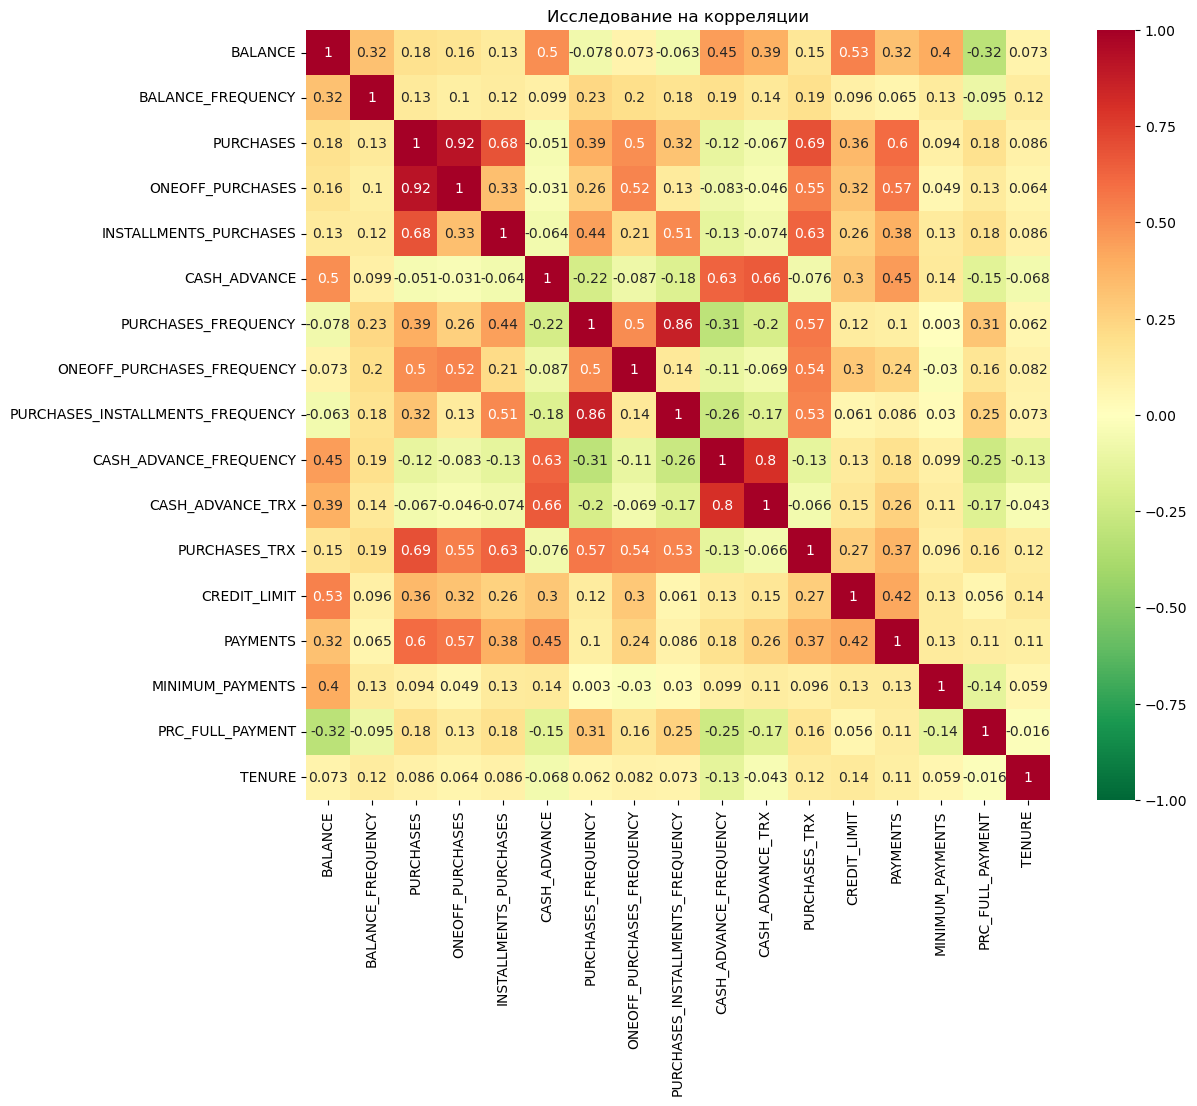

In [7]:
plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn_r', center=0, annot=True, vmin=-1, vmax=1)
plt.title('Исследование на корреляции')
plt.show()
# у большинства данных корреляция околонулевая, но некоторые пары колонок всетаки можно выделить
# частота покупок в рассрочку коррелирует с частотой покупок. Это закономерно. Человек покупающий в рассрочку скорее всего делает это частно, поэтому частоты совпадают.
# максимальный размер покупки и количество покупок в целом. Это закономерно. Чем чаще человек покупает, тем вероятнее, что рано или позно он купит чтото дорогое.
# анализ остальной части данных примерно такой же. В целом - корреляция мала.

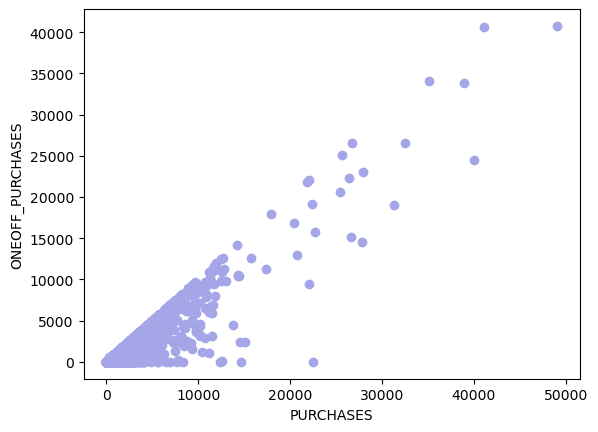

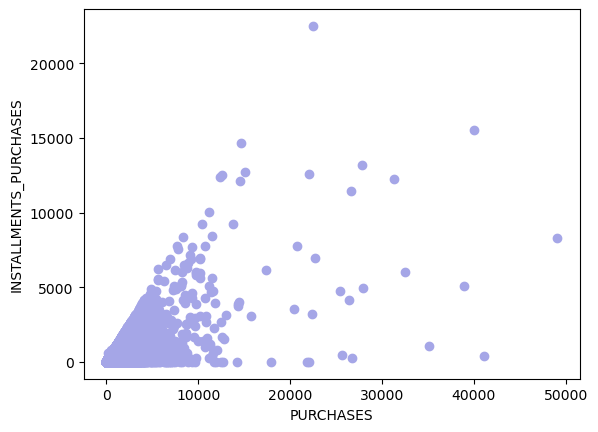

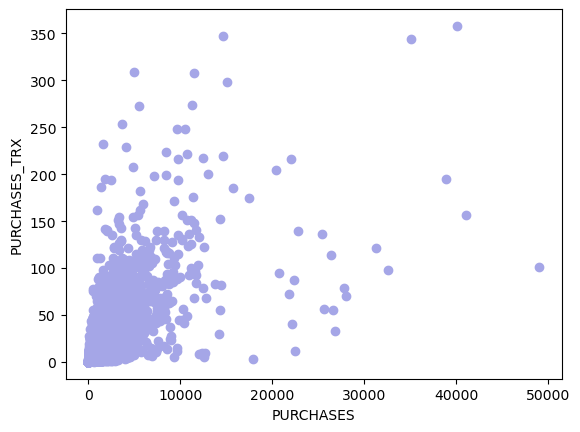

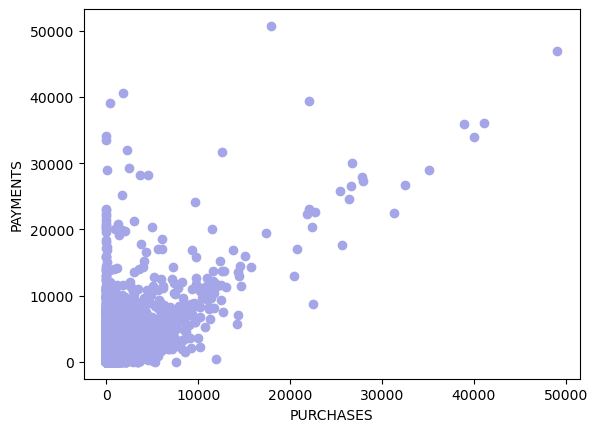

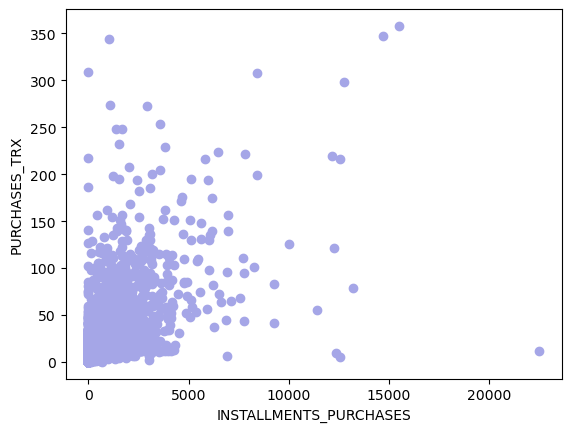

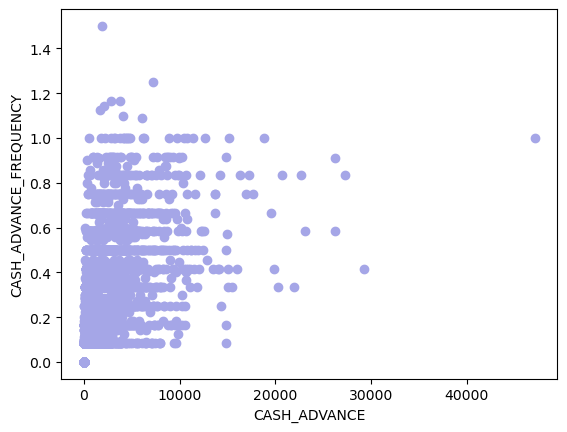

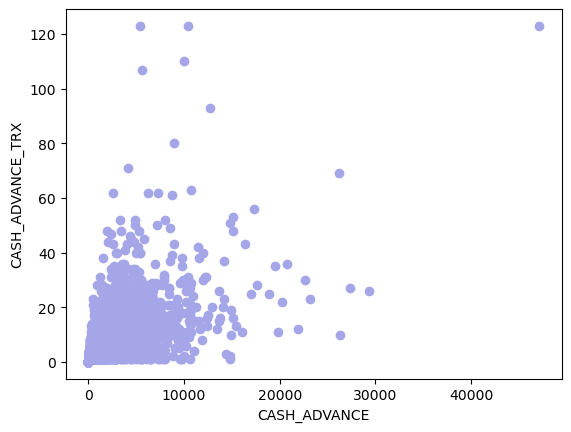

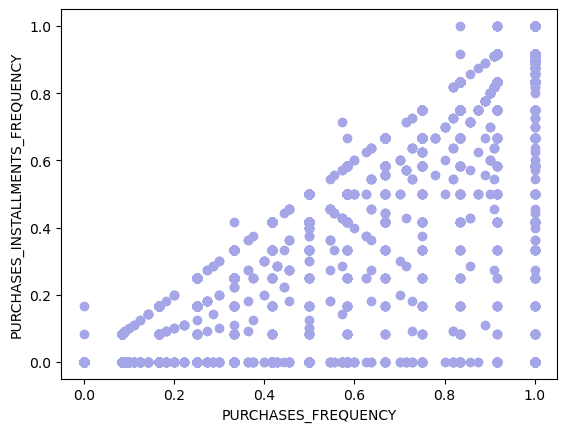

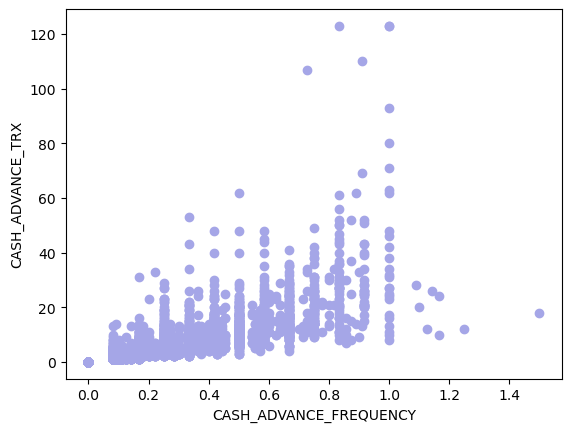

In [8]:
cor_df = df.corr()
pairs = []
for column1 in cor_df.columns:
  for column2 in cor_df.columns:
    if abs(cor_df[column1][column2]) >= 0.6 and column1 != column2 and [column1, column2] not in pairs and [column2, column1] not in pairs:
      pairs.append([column1, column2])

for pair in pairs:
  fig, ax = plt.subplots()
  plt.xlabel(pair[0])        
  plt.ylabel(pair[1])
  ax.scatter(df[pair[0]], df[pair[1]], c = '#A5A6E7')
  plt.show()

# переменная purchases коррелирует с наибольшим колличеством других переменных
# причем наибольшая плотность точек -  в районе нуля (по обеим переменным). 
# Учитывая, что тут идет исследование именно колличества совершенных покупок это закономерно,
# что чем меньше этот парааметр, тем меньше остальные
# такая же картина для Cash_advance (чем меньше, тем меньше)
# понять смысл некоторых переменных я затрудняюсь, но зависимости есть.

<Figure size 2400x2400 with 0 Axes>

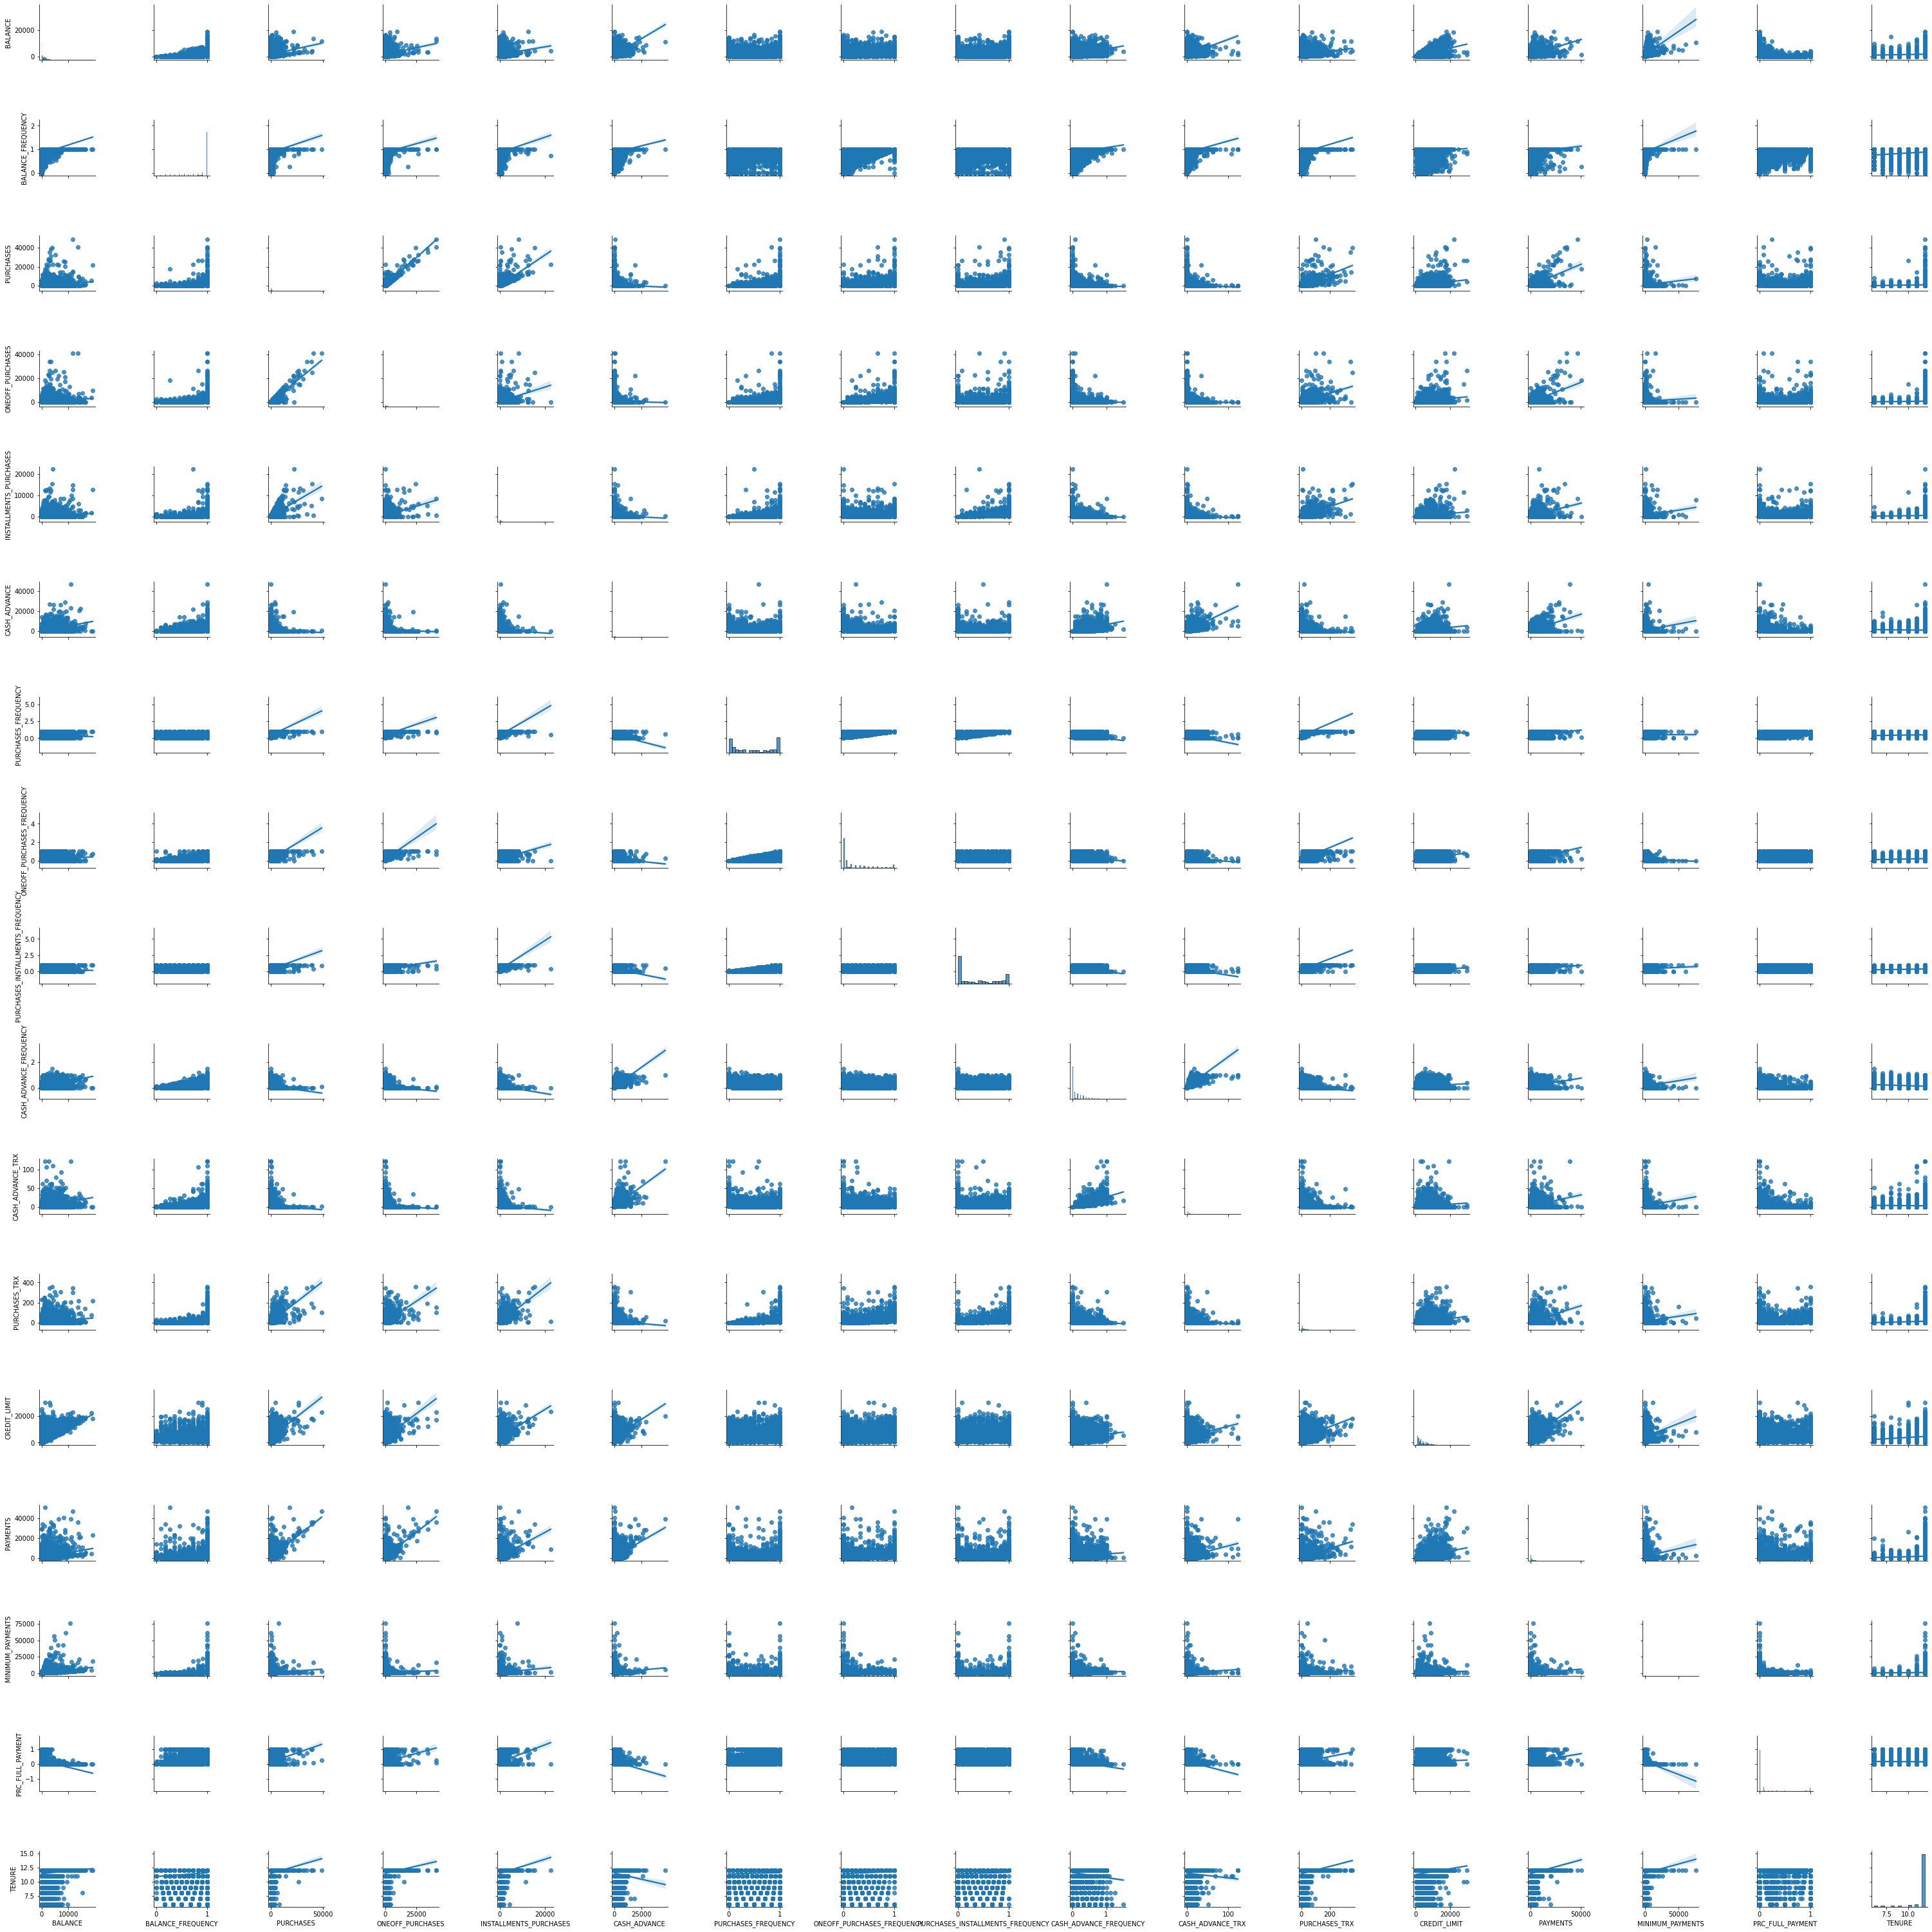

In [9]:
plt.figure(figsize=(30,30), dpi=80)
sns.pairplot(df, kind="reg")
plt.show()  
# визуальные закономерности, в виде точек выстраивающихся в линии заметны на многих графиках, в том числе на тех, для которых корреляция данных довольно мала
# я уверен, что этому есть объяснение для всех пар данных. Но их нормализованность затрудняет поиск этого объяснения.
# например частота покупок в изначальных данных могла бы представлена в днях например "7, 30, 60, 90, 120" и говорить,
# что человек совершает покупки раз в неделю/месяц/итд это объяснило бы "столбики" на графиках

### Задание 2

Реализовать метод кластарезации KMeans:
1. Методом локтя и силуется (в том числе с использованием графиков) оценить оптимальное число кластеров и обосновать его.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных. 

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib

In [11]:
df = df.drop('CUST_ID', axis = 1)
df = df.dropna(axis=0, how='any')

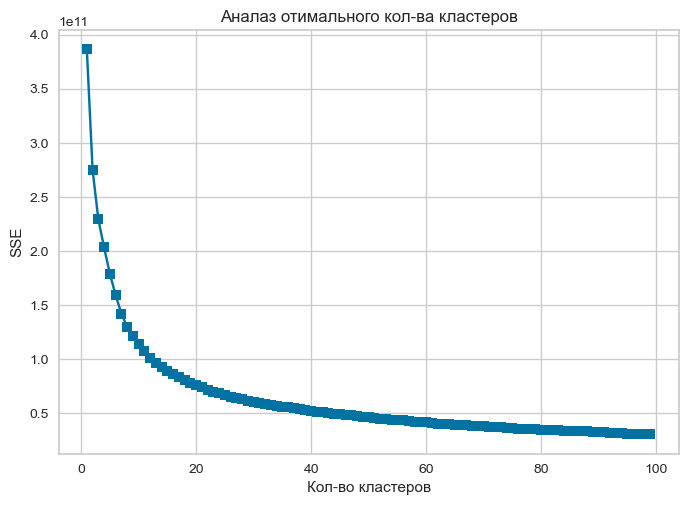

In [12]:
SSE = []
for k in range(1,100):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,100), SSE, marker='s')
plt.xlabel('Кол-во кластеров')
plt.ylabel('SSE')
plt.title('Аналаз отимального кол-ва кластеров')
plt.show()
     

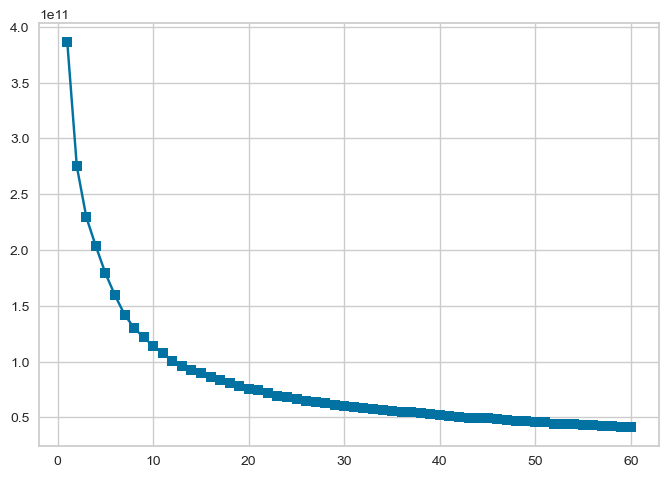

In [13]:
plt.plot(range(1,61), SSE[:60], marker='s')

In [14]:
# Приблизив график, очевидно, что он исказился незначительно, но теперь сгиб локтя видно отчетливее. 
# Он находится примерно в районе 10. В виду искажения графика думаю стоит брать колво кластеров за примерно 13-15.

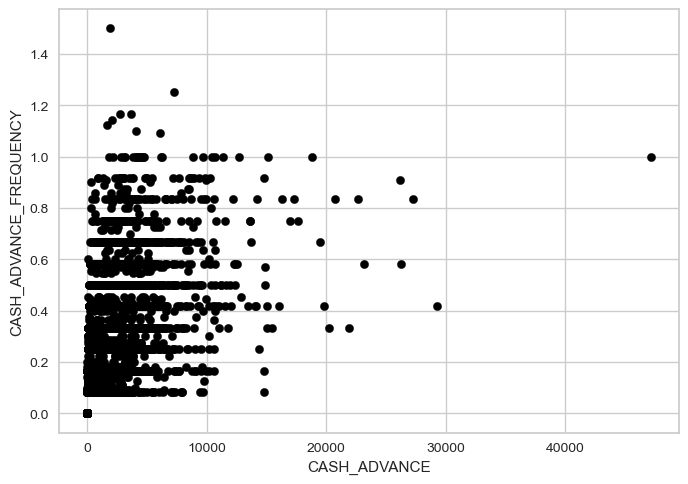

In [30]:
kmeans = KMeans(n_clusters = 14, init='k-means++')
kmeans.fit(df)
df['cluster'] = kmeans.predict(df)
plt.scatter(df['CASH_ADVANCE'], df['CASH_ADVANCE_FREQUENCY'], 35, 'black')
plt.xlabel('CASH_ADVANCE')
plt.ylabel('CASH_ADVANCE_FREQUENCY')
plt.show()

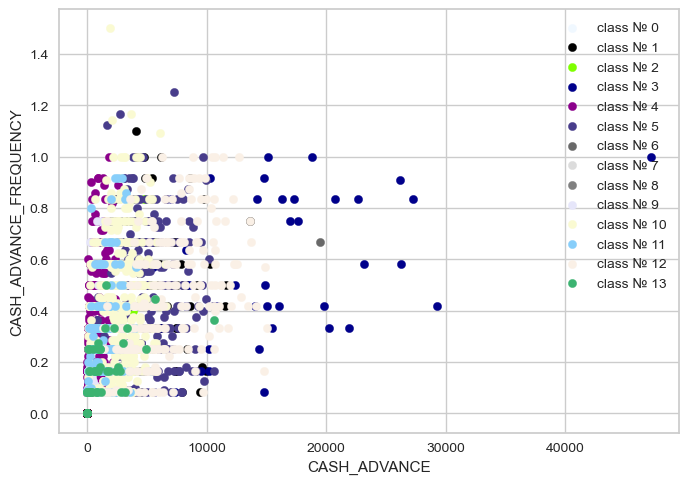

In [31]:
colors = []
for pair in matplotlib.colors.CSS4_COLORS.items():
  colors.append(pair)
     

for i in range(14): 
  plt.scatter(df[df['cluster']==i]['CASH_ADVANCE'], df[df['cluster']==i]['CASH_ADVANCE_FREQUENCY'], 35, colors[i*7][1], label=f'class № {i}')
  plt.legend(loc=0)
plt.xlabel('CASH_ADVANCE')
plt.ylabel('CASH_ADVANCE_FREQUENCY')
plt.show()

SilhouetteVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=14))

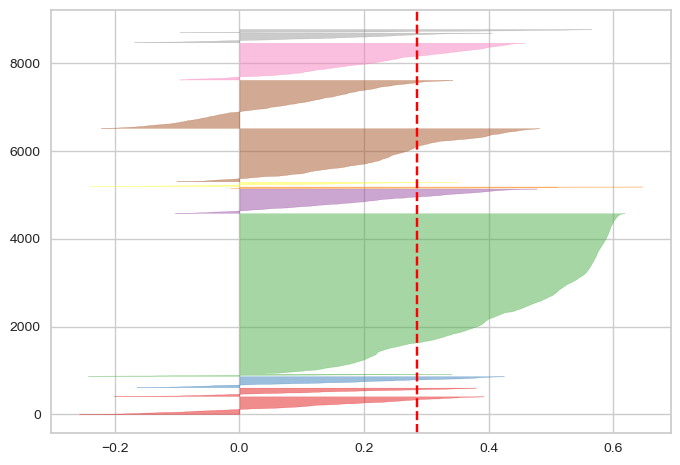

In [32]:
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df)

In [33]:
# учитывая, что данные визуально не слишком хорошо разбиваются на кластеры, я считаю, что средний коэф равный 3.5 более чем хорош:)
# особенно, что кластеризация идет по всем параметрам сразу

['CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY']
['CASH_ADVANCE', 'CASH_ADVANCE_TRX']
['CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX']


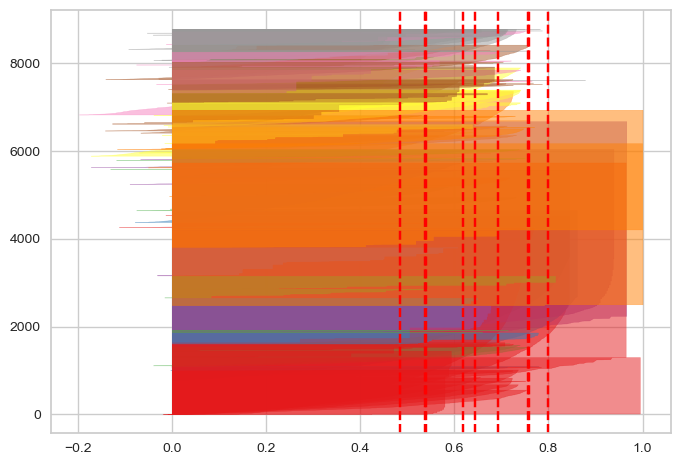

In [34]:
cor_df = df.corr()
pairs = []
for column1 in cor_df.columns:
  for column2 in cor_df.columns:
    if abs(cor_df[column1][column2]) >= 0.6 and column1 != column2 and [column1, column2] not in pairs and [column2, column1] not in pairs:
      pairs.append([column1, column2])

for pair in pairs:
  kmeans = KMeans(n_clusters = 14, init='k-means++')
  col = pair
  kmeans.fit(df[col])
  visualizer = SilhouetteVisualizer(kmeans)
  visualizer.fit(df[col])
  if visualizer.silhouette_score_ > 0.75:
    print(pair)

SilhouetteVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=14))

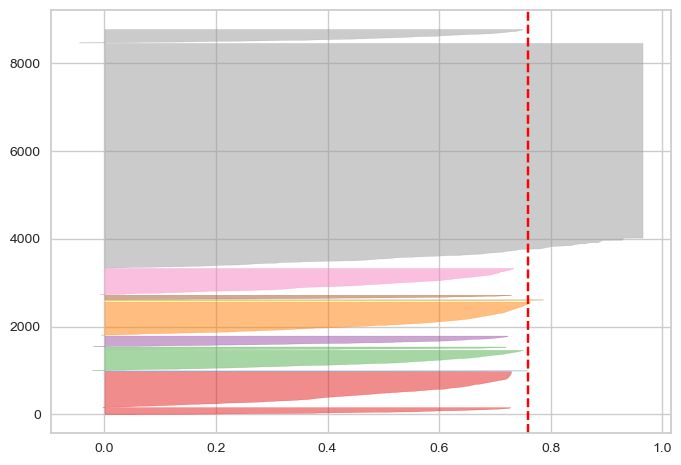

In [23]:
kmeans = KMeans(n_clusters = 14, init='k-means++')
col = ['CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY']
kmeans.fit(df[col])
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df[col])

SilhouetteVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=14))

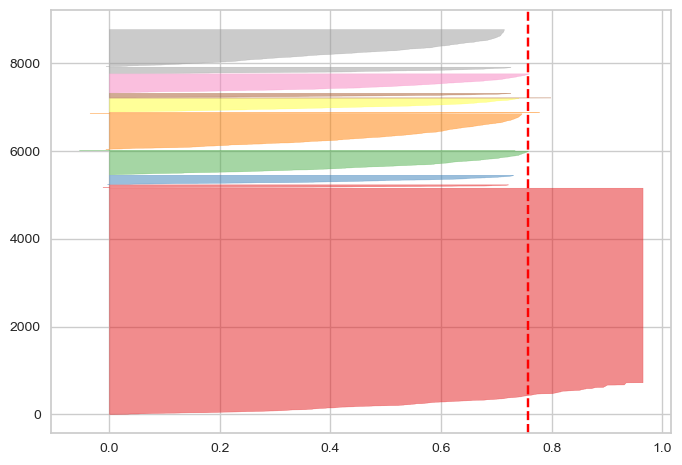

In [24]:
kmeans = KMeans(n_clusters = 14, init='k-means++')
col = ['CASH_ADVANCE', 'CASH_ADVANCE_TRX']
kmeans.fit(df[col])
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df[col])

SilhouetteVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=14))

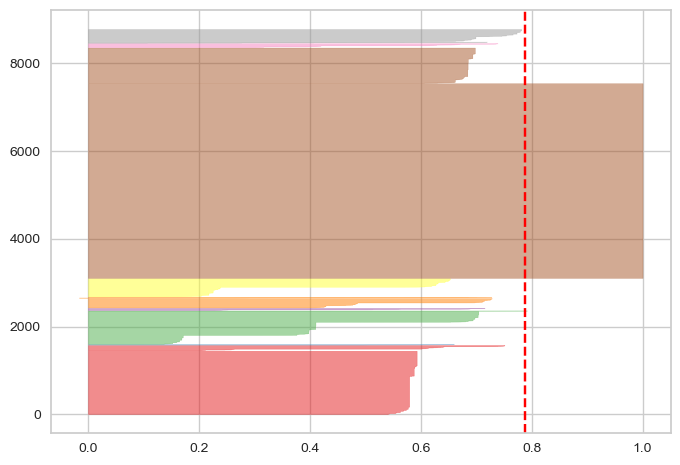

In [25]:
kmeans = KMeans(n_clusters = 14, init='k-means++')
col = ['CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX']
kmeans.fit(df[col])
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df[col])

In [26]:
# по приведенным выше трем парам полей кластеризация проходит очень хорошо

### Задание 3

Реализовать иерархический метод кластарезации:
1. Должны быть построены дендрограммы и обоснован выбор количества кластеров.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных.

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

In [39]:
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt

In [ ]:
plt.figure(figsize=(15, 15))
Z = linkage(df, 'centroid')
d = dendrogram(Z)
# по этому графику мало что понятно

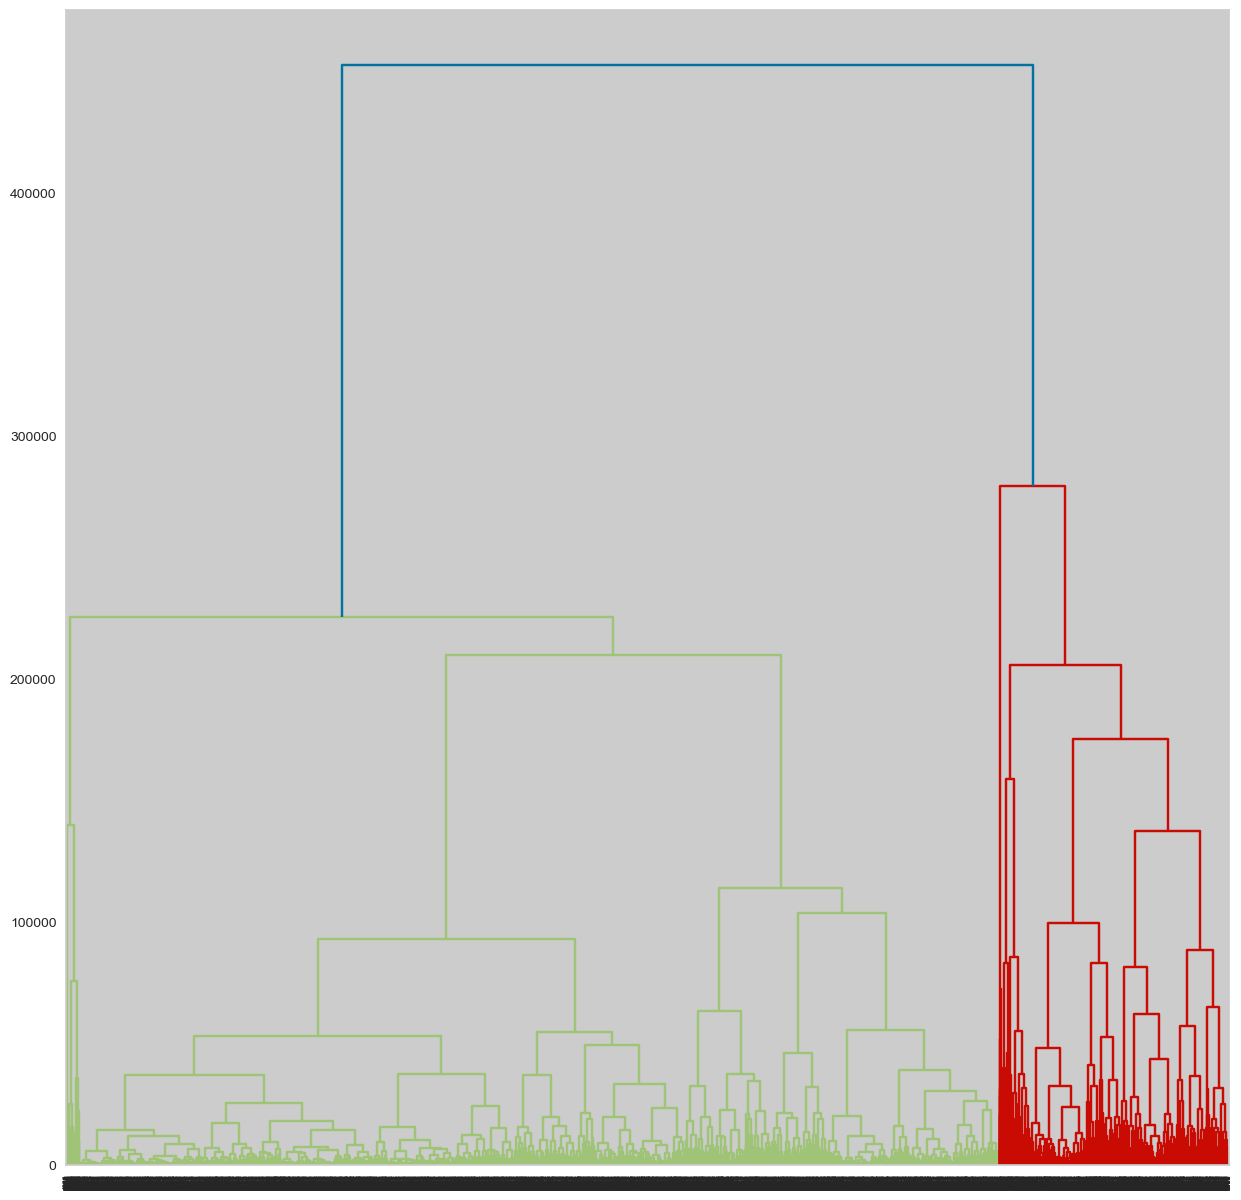

In [40]:
plt.figure(figsize=(15, 15))
Z = linkage(df, 'ward')
d = dendrogram(Z)

In [ ]:
# На этом графике я бы расстояние ограничил примерно 95000. Кластеров будет примерно 14.

In [83]:
label = fcluster(Z, 92835, criterion='distance')
df['cluster'] = label
print(len(np.unique(label)))

14


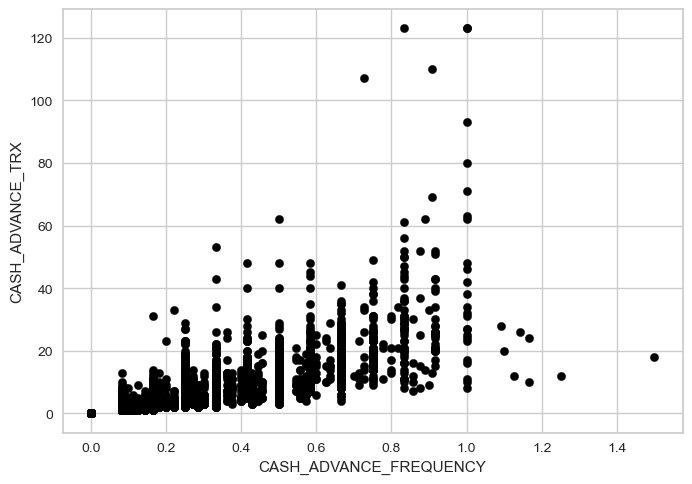

In [84]:
plt.scatter(df['CASH_ADVANCE_FREQUENCY'], df['CASH_ADVANCE_TRX'], 35, 'black')
plt.xlabel('CASH_ADVANCE_FREQUENCY')
plt.ylabel('CASH_ADVANCE_TRX')
plt.show()

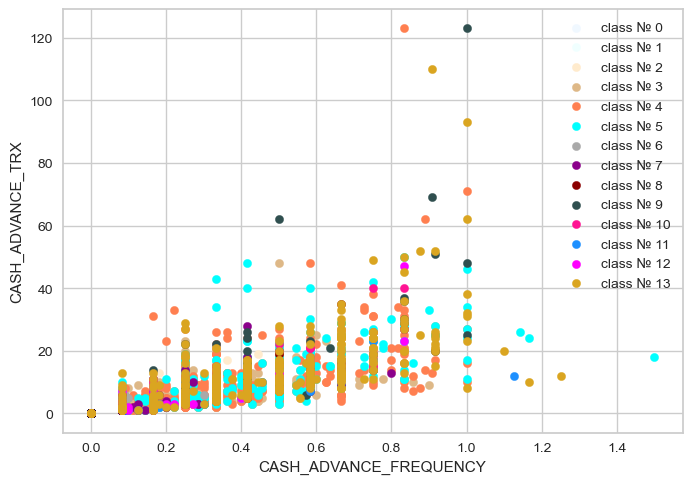

In [87]:
for i in range(14): 
  plt.scatter(df[df['cluster']==i]['CASH_ADVANCE_FREQUENCY'], df[df['cluster']==i]['CASH_ADVANCE_TRX'], 35, colors[i*4][1], label=f'class № {i}')
  plt.legend(loc=1)
plt.xlabel('CASH_ADVANCE_FREQUENCY')
plt.ylabel('CASH_ADVANCE_TRX')
plt.show()

In [ ]:
plt.figure(figsize=(15, 15))
Z = linkage(df, 'average')
d = dendrogram(Z)
# Этот график также плохо поддается анализу